# **Performing Principal Component Analysis (PCA) : Wine Dataset**

---

## **1.Rudimentary : Simple PCA Analysis**

### Load library

In [53]:
from sklearn import datasets
from sklearn import preprocessing
from sklearn import utils

### Load dataset

In [2]:
wine = datasets.load_wine()

### Input features

In [3]:
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


### Output features

In [4]:
print(wine.target_names)

['class_0' 'class_1' 'class_2']


### Assigning Input (X) and Output (Y) variables
Let's assign the 4 input variables to X and the output variable (class label) to Y

In [5]:
X = wine.data
Y = wine.target

### Let's examine the data dimension

In [6]:
X.shape

(178, 13)

In [7]:
Y.shape

(178,)

---

## **2. PCA analysis**

### 2.1. Load library

In [8]:
from sklearn.preprocessing import scale # Data scaling
from sklearn import decomposition #PCA
import pandas as pd # pandas

### 2.2. Data scaling

In [9]:
X = scale(X)

### 2.3. Perform PCA analysis

Here we define the number of PC to use as 3

In [10]:
pca = decomposition.PCA(n_components=3)
pca.fit(X)


PCA(n_components=3)

#### 2.4. Compute and retrieve the **scores** values

In [11]:
scores = pca.transform(X)

In [12]:
scores_df = pd.DataFrame(scores, columns=['PC1', 'PC2', 'PC3'])
scores_df

PC1       PC2       PC3
0    3.316751 -1.443463 -0.165739
1    2.209465  0.333393 -2.026457
2    2.516740 -1.031151  0.982819
3    3.757066 -2.756372 -0.176192
4    1.008908 -0.869831  2.026688
..        ...       ...       ...
173 -3.370524 -2.216289 -0.342570
174 -2.601956 -1.757229  0.207581
175 -2.677839 -2.760899 -0.940942
176 -2.387017 -2.297347 -0.550696
177 -3.208758 -2.768920  1.013914

[178 rows x 3 columns]

In [13]:
Y_label = []

for i in Y:
  if i == 0:
    Y_label.append('class_0')
  elif i == 1:
    Y_label.append('class_1')
  else:
    Y_label.append('class_2')

Classes = pd.DataFrame(Y_label, columns=['Classes'])

In [14]:
df_scores = pd.concat([scores_df, Classes], axis=1)

#### 2.5. Retrieve the **loadings** values

In [15]:
loadings = pca.components_.T
df_loadings = pd.DataFrame(loadings, columns=['PC1', 'PC2','PC3'], index=wine.feature_names)
df_loadings

PC1       PC2       PC3
alcohol                       0.144329 -0.483652 -0.207383
malic_acid                   -0.245188 -0.224931  0.089013
ash                          -0.002051 -0.316069  0.626224
alcalinity_of_ash            -0.239320  0.010591  0.612080
magnesium                     0.141992 -0.299634  0.130757
total_phenols                 0.394661 -0.065040  0.146179
flavanoids                    0.422934  0.003360  0.150682
nonflavanoid_phenols         -0.298533 -0.028779  0.170368
proanthocyanins               0.313429 -0.039302  0.149454
color_intensity              -0.088617 -0.529996 -0.137306
hue                           0.296715  0.279235  0.085222
od280/od315_of_diluted_wines  0.376167  0.164496  0.166005
proline                       0.286752 -0.364903 -0.126746

#### 2.6. **Explained variance** for each PC

In [16]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.36198848, 0.1920749 , 0.11123631])

## **3. Scree Plot**

### 3.1. Import library

In [17]:
import numpy as np
import plotly.express as px

### 3.2. Preparing explained variance and cumulative variance

#### 3.2.1. Preparing the explained variance data

In [18]:
explained_variance

array([0.36198848, 0.1920749 , 0.11123631])

In [19]:
explained_variance = np.insert(explained_variance, 0, 0)

#### 3.2.2. Preparing the cumulative variance data

In [20]:
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))

#### 3.2.3. Combining the dataframe

In [21]:
pc_df = pd.DataFrame(['','PC1', 'PC2', 'PC3'], columns=['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

In [22]:
df_explained_variance = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)
df_explained_variance

PC  Explained Variance  Cumulative Variance
0                 0.000000                0.000
1  PC1            0.361988                0.362
2  PC2            0.192075                0.554
3  PC3            0.111236                0.665

#### 3.2.4. Making the scree plot

##### 3.2.4.1. Explained Variance

In [23]:
# https://plotly.com/python/bar-charts/

fig = px.bar(df_explained_variance, 
             x='PC', y='Explained Variance',
             text='Explained Variance',
             width=800)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.show()

##### 3.2.4.2. Explained Variance + Cumulative Variance

In [24]:
# https://plotly.com/python/creating-and-updating-figures/

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Cumulative Variance'],
        marker=dict(size=15, color="LightSeaGreen")
    ))

fig.add_trace(
    go.Bar(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Explained Variance'],
        marker=dict(color="RoyalBlue")
    ))

fig.show()

##### 3.2.4.3. Explained Variance + Cumulative Variance (Separate Plot)

In [25]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Cumulative Variance'],
        marker=dict(size=15, color="LightSeaGreen")
    ), row=1, col=1
    )

fig.add_trace(
    go.Bar(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Explained Variance'],
        marker=dict(color="RoyalBlue"),
    ), row=1, col=2
    )

fig.show()

## **4. Scores Plot**

Source: https://plotly.com/python/3d-scatter-plots/

### 4.1. Load library
[API Documentation](https://plotly.com/python-api-reference/plotly.express.html) for *plotly.express* package

In [26]:
import plotly.express as px

### 4.2. Basic 3D Scatter Plot

In [27]:
fig = px.scatter_3d(df_scores, x='PC1', y='PC2', z='PC3',
              color='Classes')

fig.show()

### 4.3. Customized 3D Scatter Plot

In [28]:
fig = px.scatter_3d(df_scores, x='PC1', y='PC2', z='PC3',
              color='Classes',
              symbol='Classes',
              opacity=0.5)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

# https://plotly.com/python/templates/
#fig.update_layout(template='plotly_white') # "plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"

## **5. Loadings Plot**

In [29]:
loadings_label = df_loadings.index
# loadings_label = df_loadings.index.str.strip(' (cm)')

fig = px.scatter_3d(df_loadings, x='PC1', y='PC2', z='PC3',
                    text = loadings_label)

fig.show()

---

## **2. Wine Prediction- Raw, Normalized and PCA'd**

In [32]:
#Print Descriptio of Wine Dataset
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

## **EDA**

In [33]:
#Using Pandas df for easy perusal and functions passing

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['label'] = wine.target
df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  label  
0                          3.92   1065.0      0  
1                          3.40   1050.0      0  
2                          3.17   1185.0      0  
3                          3.45   1480.0      0  
4                          2.93    735.0      0

In [34]:
df.shape
#178 observations and 12 charateristics

(178, 14)

In [35]:
df.info
#basic data info of data frame

<bound method DataFrame.info of      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  no

In [36]:
df.describe()
#statistics summary

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

            label  
count  178.000000  
mean     0.938202  
std      0.775035  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000

In [37]:
df.corr()
#we should remove co-related values for a better regression model

alcohol  malic_acid       ash  \
alcohol                       1.000000    0.094397  0.211545   
malic_acid                    0.094397    1.000000  0.164045   
ash                           0.211545    0.164045  1.000000   
alcalinity_of_ash            -0.310235    0.288500  0.443367   
magnesium                     0.270798   -0.054575  0.286587   
total_phenols                 0.289101   -0.335167  0.128980   
flavanoids                    0.236815   -0.411007  0.115077   
nonflavanoid_phenols         -0.155929    0.292977  0.186230   
proanthocyanins               0.136698   -0.220746  0.009652   
color_intensity               0.546364    0.248985  0.258887   
hue                          -0.071747   -0.561296 -0.074667   
od280/od315_of_diluted_wines  0.072343   -0.368710  0.003911   
proline                       0.643720   -0.192011  0.223626   
label                        -0.328222    0.437776 -0.049643   

                              alcalinity_of_ash  magnesium  total_phenols  \
alcohol                               -0.310235   0.270798       0.289101   
malic_acid                             0.288500  -0.054575      -0.335167   
ash                                    0.443367   0.286587       0.128980   
alcalinity_of_ash                      1.000000  -0.083333      -0.321113   
magnesium                             -0.083333   1.000000       0.214401   
total_phenols                         -0.321113   0.214401       1.000000   
flavanoids                            -0.351370   0.195784       0.864564   
nonflavanoid_phenols                   0.361922  -0.256294      -0.449935   
proanthocyanins                       -0.197327   0.236441       0.612413   
color_intensity                        0.018732   0.199950      -0.055136   
hue                                   -0.273955   0.055398       0.433681   
od280/od315_of_diluted_wines          -0.276769   0.066004       0.699949   
proline                               -0.440597   0.393351       0.498115   
label                                  0.517859  -0.209179      -0.719163   

                              flavanoids  nonflavanoid_phenols  \
alcohol                         0.236815             -0.155929   
malic_acid                     -0.411007              0.292977   
ash                             0.115077              0.186230   
alcalinity_of_ash              -0.351370              0.361922   
magnesium                       0.195784             -0.256294   
total_phenols                   0.864564             -0.449935   
flavanoids                      1.000000             -0.537900   
nonflavanoid_phenols           -0.537900              1.000000   
proanthocyanins                 0.652692             -0.365845   
color_intensity                -0.172379              0.139057   
hue                             0.543479             -0.262640   
od280/od315_of_diluted_wines    0.787194             -0.503270   
proline                         0.494193             -0.311385   
label                          -0.847498              0.489109   

                              proanthocyanins  color_intensity       hue  \
alcohol                              0.136698         0.546364 -0.071747   
malic_acid                          -0.220746         0.248985 -0.561296   
ash                                  0.009652         0.258887 -0.074667   
alcalinity_of_ash                   -0.197327         0.018732 -0.273955   
magnesium                            0.236441         0.199950  0.055398   
total_phenols                        0.612413        -0.055136  0.433681   
flavanoids                           0.652692        -0.172379  0.543479   
nonflavanoid_phenols                -0.365845         0.139057 -0.262640   
proanthocyanins                      1.000000        -0.025250  0.295544   
color_intensity                     -0.025250         1.000000 -0.521813   
hue                                  0.295544        -0.521813  1.000000   
od280/od315

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  label

<AxesSubplot: >

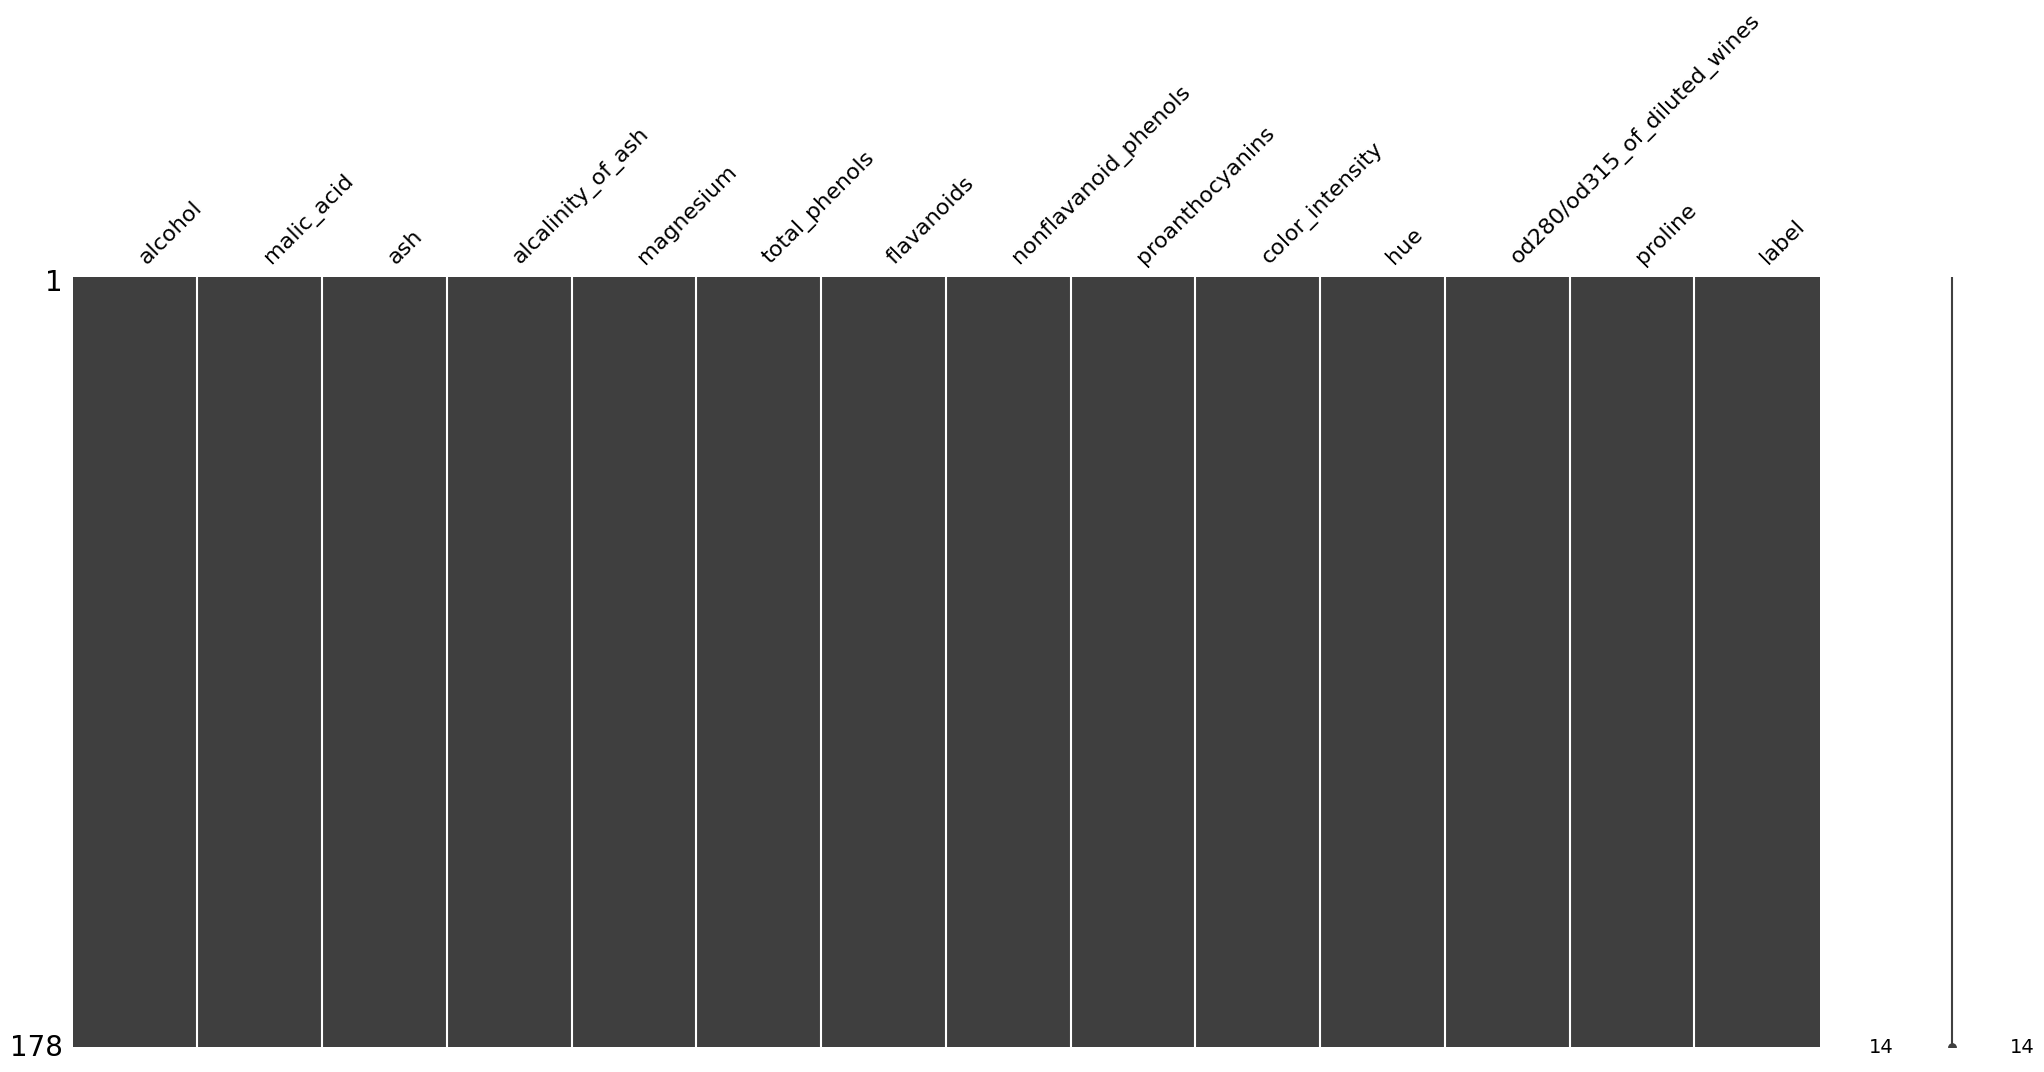

In [38]:
# Missingno is an important package used for preprocessing and specifically to eliminate null or forms or null values.
# pip install missingno
# Original Publication https://joss.theoj.org/papers/10.21105/joss.00547
#check for null/missing values
df.info()
import missingno as msno
msno.matrix(df)

The matrix visualizes no null values for the dataset.

## **Checking for balance**

In [39]:
np.bincount(df["label"])

array([59, 71, 48], dtype=int64)

In [40]:
#percentage representation of the classes
df.label.value_counts(normalize=True).round(3)


1    0.399
0    0.331
2    0.270
Name: label, dtype: float64

The dominant class for the labels is Label 01, but since the classes dont have problematic imabalances we can proceed further.

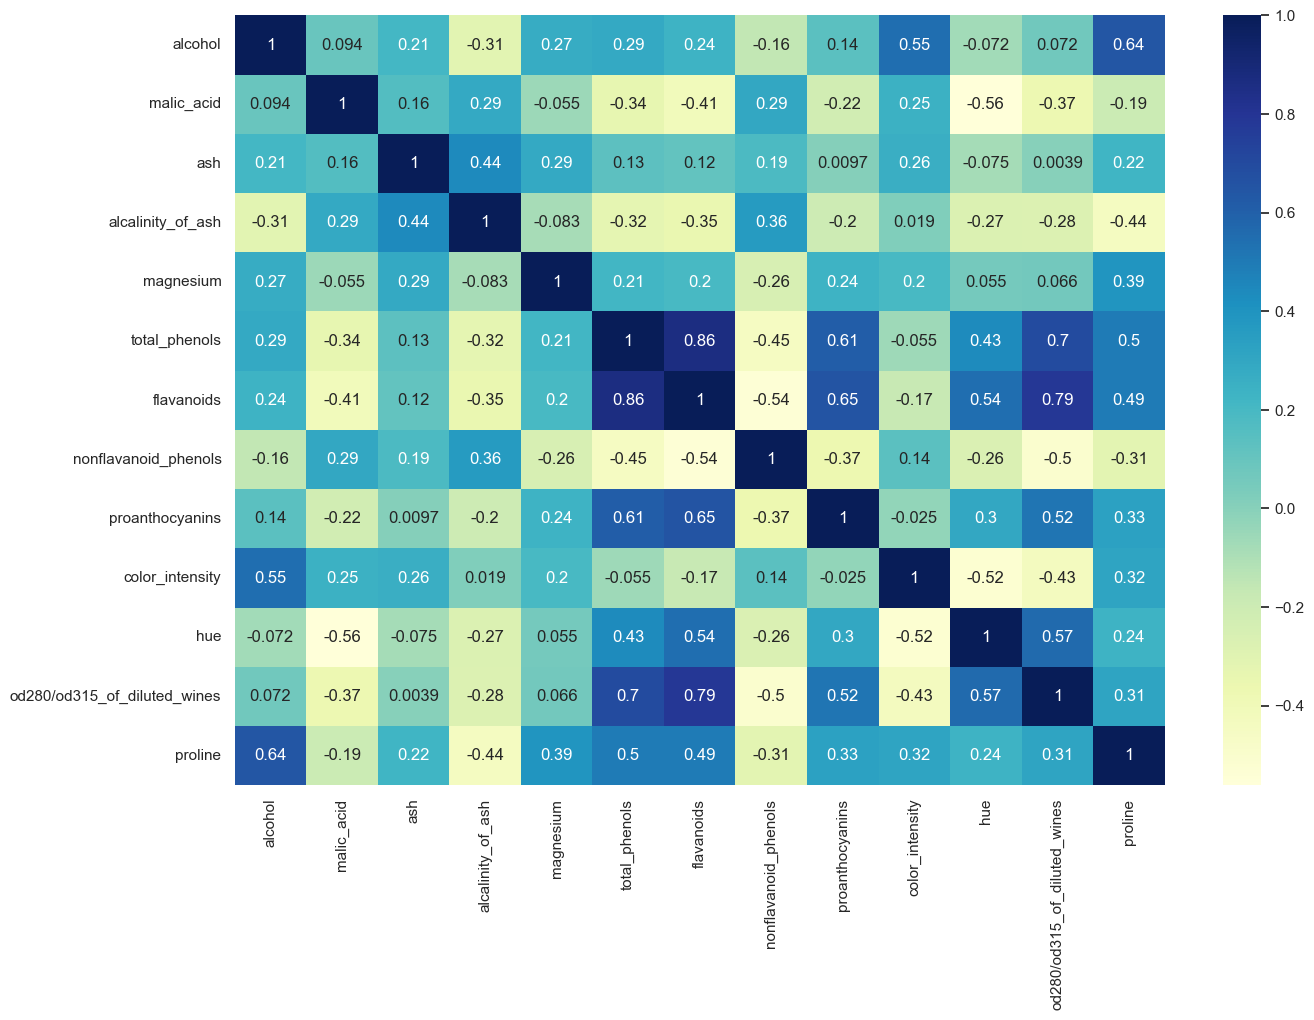

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.iloc[:,:-1].corr(), annot=True, cmap="YlGnBu")
plt.show()



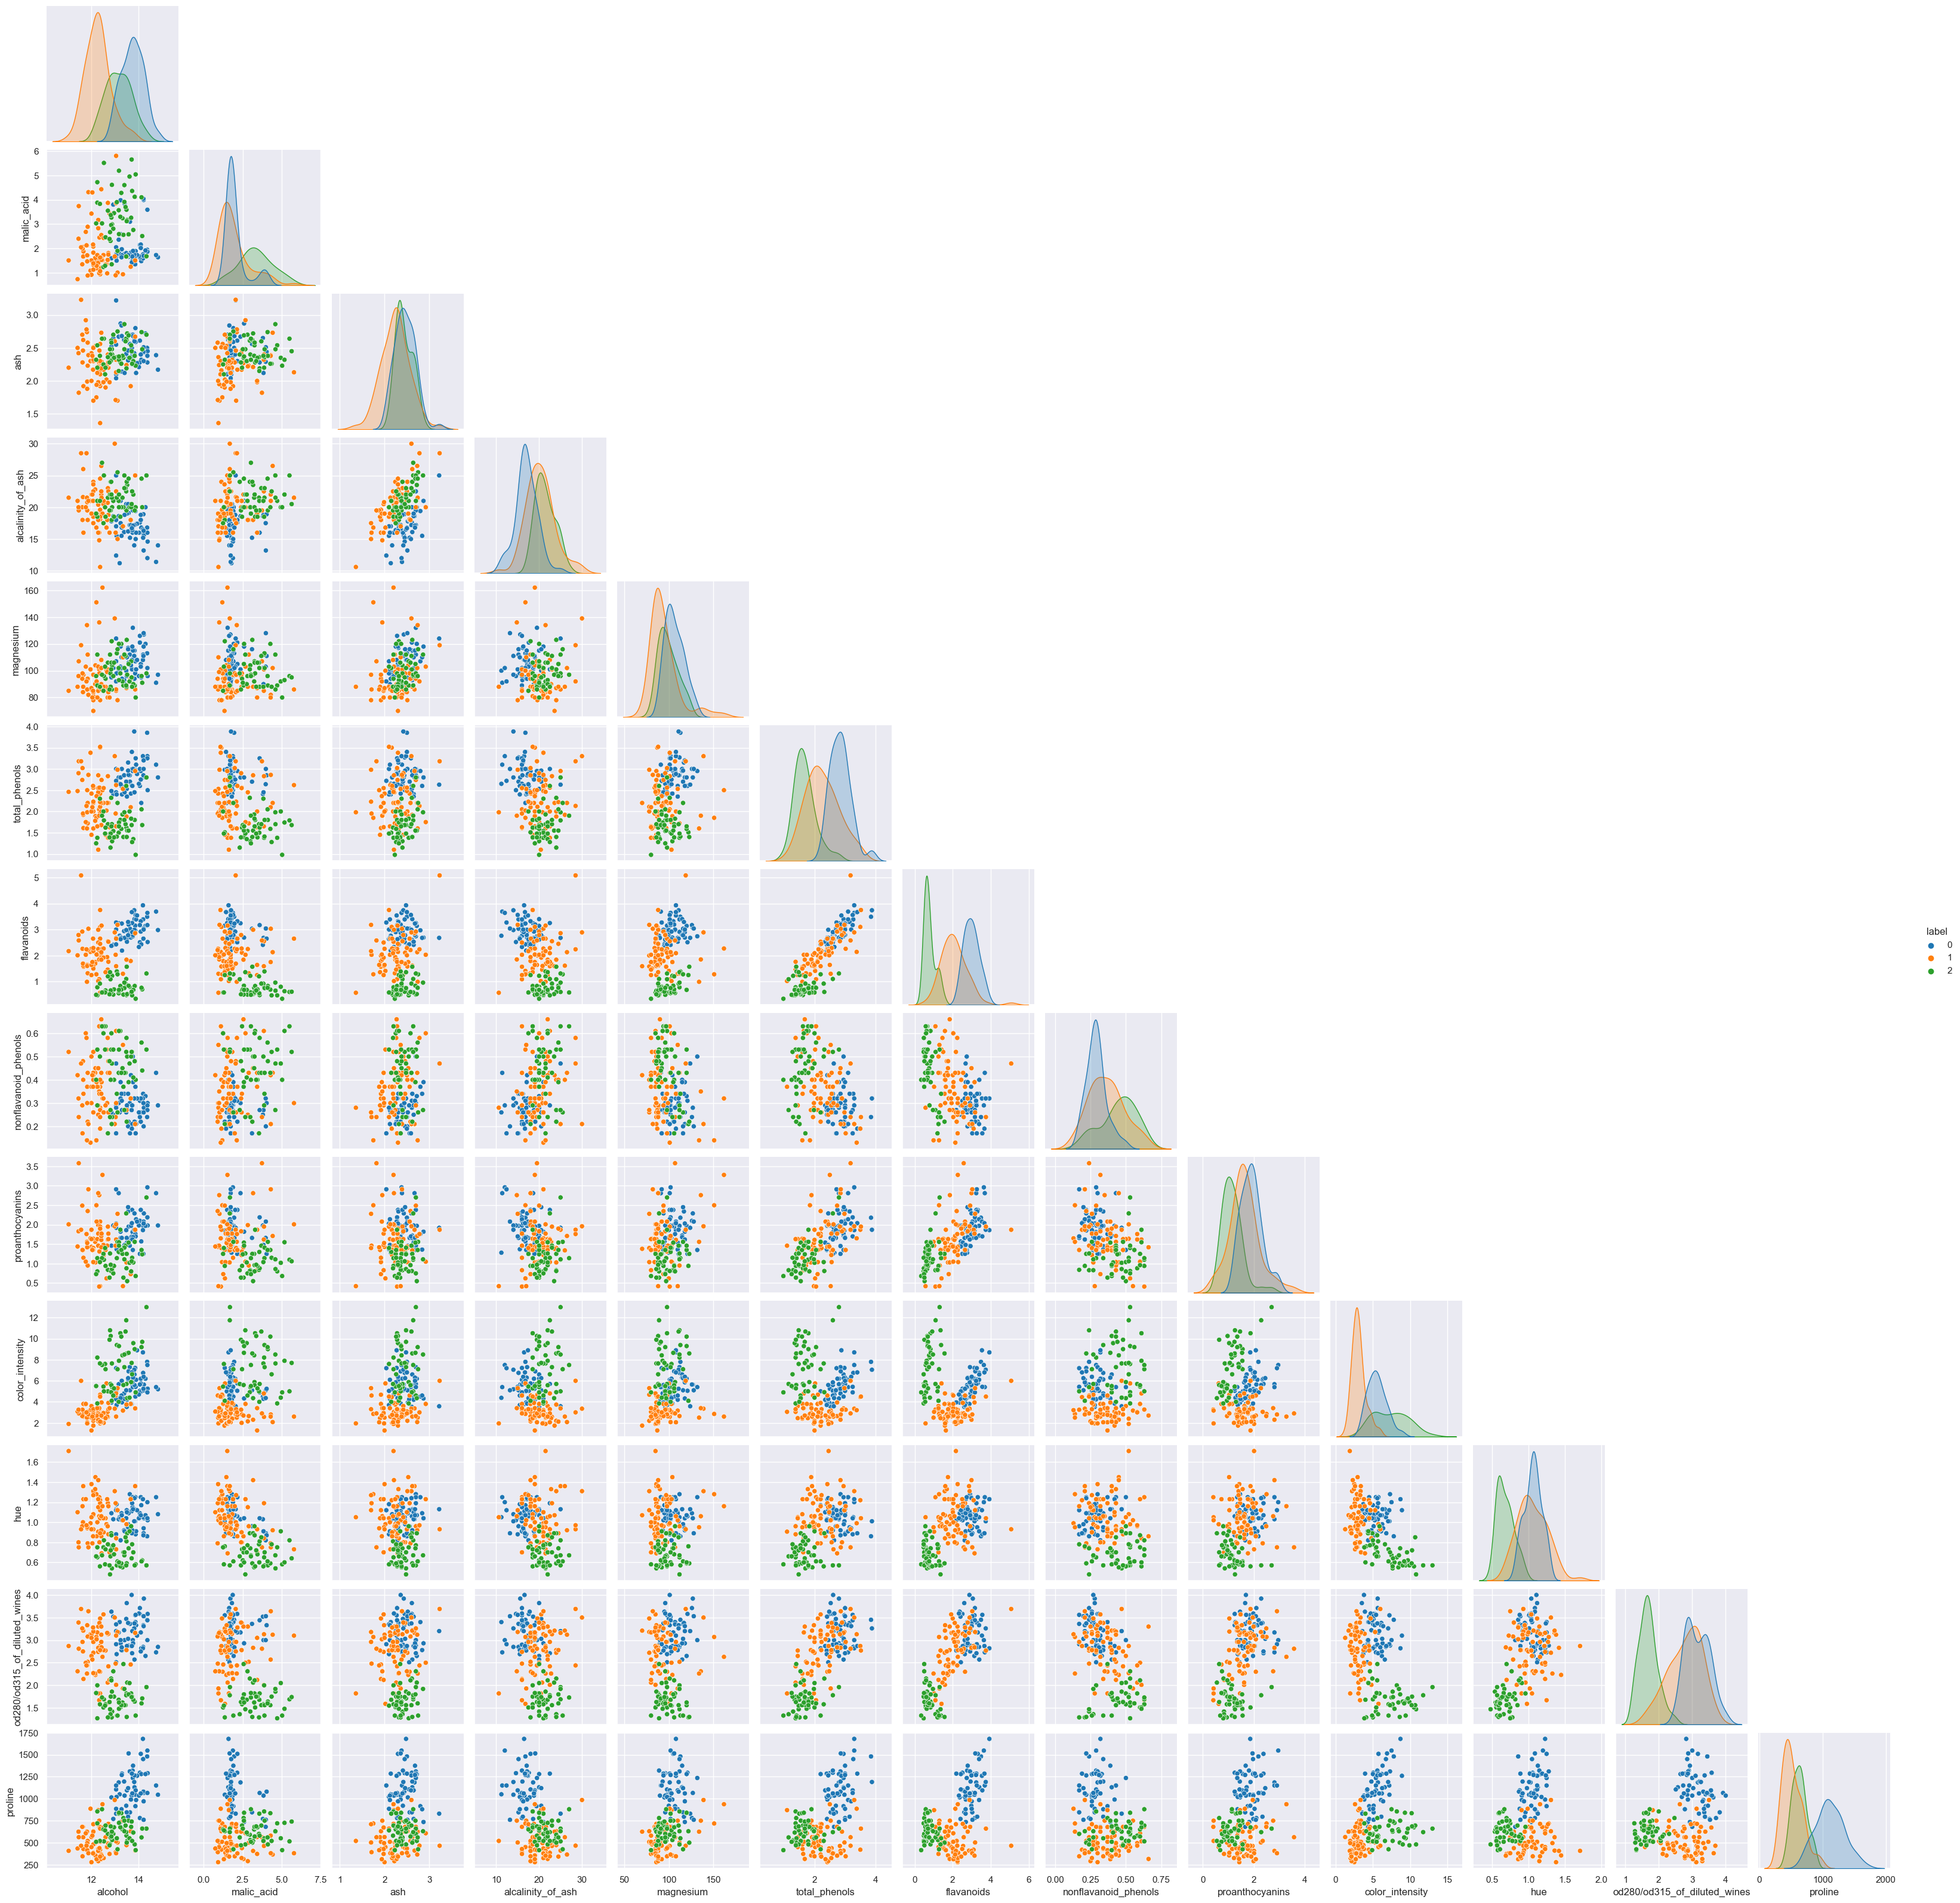

In [42]:
sns.pairplot(df, 
             hue='label', 
             palette="tab10", 
             corner=True)

plt.show()

Some features have quite high linear correaltion:
-  flavanoids / total phenols 0.86
-  flavanoids / od280/od315_of_diluted_wines 0.79

Feature that separate the classes quite well are:
-  proline

## **PCA Analysis of Complete Dataset**

PC_1: 0.407
PC_2: 0.19
PC_3: 0.086
PC_4: 0.074
PC_5: 0.056
PC_6: 0.047
PC_7: 0.037
PC_8: 0.024
PC_9: 0.023
PC_10: 0.023
PC_11: 0.014
PC_12: 0.013
PC_13: 0.008


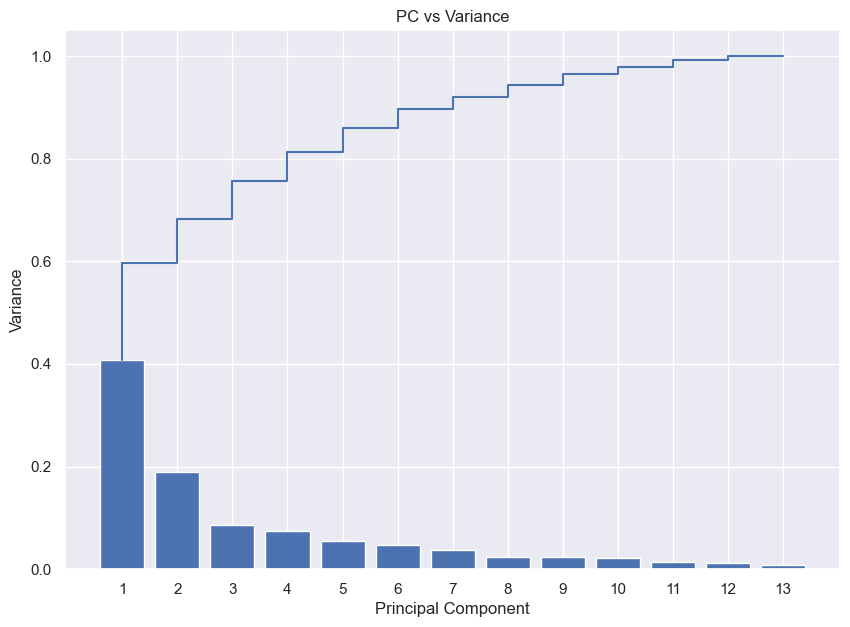

In [43]:
# X => features Y => labels
X = df.drop('label', axis=1).values
y = df.label.values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
X_sc = minmax.fit_transform(X)

# principal component
from sklearn.decomposition import PCA
pc_range = np.arange(1,X_sc.shape[1] + 1)
pca = PCA(n_components=None)
pca.fit(X_sc)

# Plotting Variances for observation
plt.figure(figsize=(10,7))
plt.bar(pc_range, pca.explained_variance_ratio_)
plt.step(pc_range, np.cumsum(pca.explained_variance_ratio_))
plt.xticks(pc_range)
plt.xlabel("Principal Component")
plt.ylabel("Variance")
plt.title("PC vs Variance")
for i, k in enumerate(pca.explained_variance_ratio_):
    print(f"PC_{i+1}: {round(k, 3)}")

This graph visualizes the how dominant the variances are. We couuld have balanced the features or removed the insignificant features but since the aim is to perform PCA, I will skip that for the moment.
for more details on balancing variances read this : https://towardsdatascience.com/balancing-bias-and-variance-to-control-errors-in-machine-learning-16ced95724db

In [44]:
df.describe().loc[['min', 'max']].T


min      max
alcohol                        11.03    14.83
malic_acid                      0.74     5.80
ash                             1.36     3.23
alcalinity_of_ash              10.60    30.00
magnesium                      70.00   162.00
total_phenols                   0.98     3.88
flavanoids                      0.34     5.08
nonflavanoid_phenols            0.13     0.66
proanthocyanins                 0.41     3.58
color_intensity                 1.28    13.00
hue                             0.48     1.71
od280/od315_of_diluted_wines    1.27     4.00
proline                       278.00  1680.00
label                           0.00     2.00